# Regression

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
%matplotlib inline

## ML and MAP Estimation

## Step 1 - Loading Dataset

In [2]:
X_ds1 = np.loadtxt('A2_data/dataset1_inputs.txt')
Y_ds1 = np.loadtxt('A2_data/dataset1_outputs.txt')

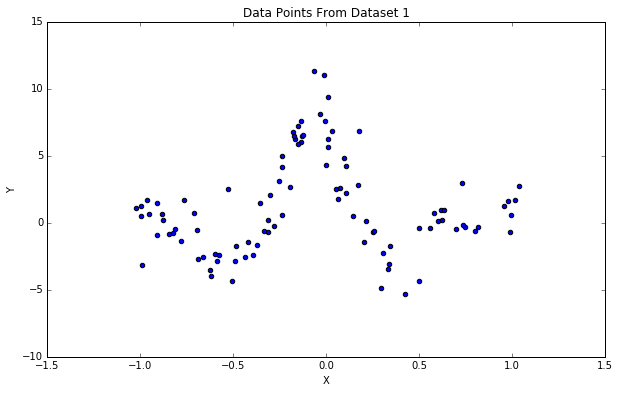

In [3]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax.set_title("Data Points From Dataset 1")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.scatter(X_ds1, Y_ds1)
fig.savefig('step1.png')

## Step 2A - Building the Regression Model

In [4]:
class Regression:
    def __init__(self, X, Y, size=20):
        self.MAP_Phi = []
        self.MLE_Phi = []
        self.MAP_W = []
        self.MLE_W = []
        self.MLE_MSE = []
        self.MAP_MSE = []
        self.D = size
        self.X = X
        self.Y = Y
    
    def ml_estimate_func(self, size, X):
        y_MLE = 0
        for i in range(0, size):
            y_MLE += self.MLE_W[size-1][i] * pow(X, i)
        return y_MLE
    
    def map_estimate_func(self, size, X):
        y_MAP = 0
        for i in range(0, size):
            y_MAP += self.MAP_W[size-1][i] * pow(X, i)
        return y_MAP
    
    def ml_fd(self, x, size, ite):
        _sum = 0
        for i in range(size):
            _sum += (self.MLE_W[size-1][i] * np.array(self.MLE_Phi[size-1][ite][i]))
        return _sum
    
    def map_fd(self, x, size, ite):
        _sum = 0
        for i in range(size):
            _sum += (self.MAP_W[size-1][i] * np.array(self.MAP_Phi[size-1][ite][i]))
        return _sum
    
    def calc_map_mse(self, X, Y):
        self.MAP_MSE = []
        for d_size in range(1, self.D+1):
            mse = 0
            _sum = 0
            for x, y, ite in zip(X, Y, np.arange(len(X))):
                _sum += pow(y - self.map_fd(x, d_size, ite), 2)
            mse = _sum / len(X)
            self.MAP_MSE.append(mse)
        #print self.MAP_MSE
        return self.MAP_MSE

    def calc_ml_mse(self, X, Y):
        self.MLE_MSE = []
        for d_size in range(1, self.D+1):
            mse = 0
            _sum = 0
            for x, y, ite in zip(X, Y, np.arange(len(X))):
                _sum += pow(y - self.ml_fd(x, d_size, ite), 2)
            mse = _sum / len(X)
            self.MLE_MSE.append(mse)
        return self.MLE_MSE
            
    def ml_estimate(self):
        self.MLE_W = []
        for d in range(1, self.D+1):
            P = []
            for obs in self.X:
                small_phi = []
                for i in range(1, d+1):
                    small_phi.append(pow(obs, i-1))
                P.append(small_phi)
            Phi = np.array(P)
            self.MLE_Phi.append(Phi)
            w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(Phi), Phi)), np.transpose(Phi)), self.Y)
            self.MLE_W.append(w)
        #return self.MLE_W
    
    def map_estimate(self, Lambda=0.001):
        self.MAP_W = []
        for d in range(1, self.D+1):
            P = []
            for obs in self.X:
                small_phi = []
                for i in range(1, d+1):
                    small_phi.append(pow(obs, i-1))
                P.append(small_phi)
            Phi = np.array(P)
            self.MAP_Phi.append(Phi)
            w = np.dot(np.dot(np.linalg.inv(np.dot(Lambda, np.eye(d)) + np.dot(np.transpose(Phi), Phi)), np.transpose(Phi)), self.Y)
            self.MAP_W.append(w)
        #return self.MAP_W

In [5]:
D = 20 # number of basis functions
r = Regression(X_ds1, Y_ds1, D)

## Step 2B - ML Estimate and its MSE

In [6]:
r.ml_estimate()

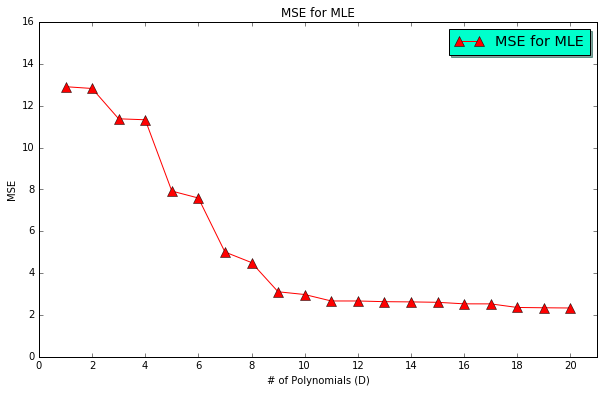

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax.set_title("MSE for MLE")
ax.set_xlabel("# of Polynomials (D)")
ax.set_ylabel("MSE")
ax.set_xlim(0, 21)
ax.set_ylim(0, 16)
ax.set_xticks(np.arange(0, 22, 2.0))
ax.plot(np.arange(1, D+1), r.calc_ml_mse(r.X, r.Y), c="red", label="MSE for MLE", marker='^', markersize="10")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step2.png")

## Step 3 - MAP vs MLE for MSE

In [8]:
r.map_estimate()

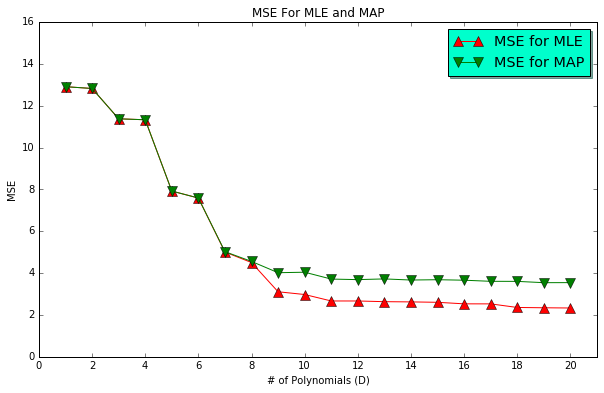

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("MSE For MLE and MAP")
ax.set_xlabel("# of Polynomials (D)")
ax.set_ylabel("MSE")
ax.set_xlim(0, 21)
ax.set_ylim(0, 16)
ax.set_xticks(np.arange(0, 22, 2.0))
ax.plot(np.arange(1, D+1), r.calc_ml_mse(r.X, r.Y), c="red", label="MSE for MLE", marker='^', markersize="10")
ax.plot(np.arange(1, D+1), r.calc_map_mse(r.X, r.Y), c="green", label="MSE for MAP", marker="v", markersize="10")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step3.png")

## Step 4 - MAP and ML Estimate Functions

### D = 5

In [10]:
x = np.linspace(r.X.min(), r.X.max(), 100)

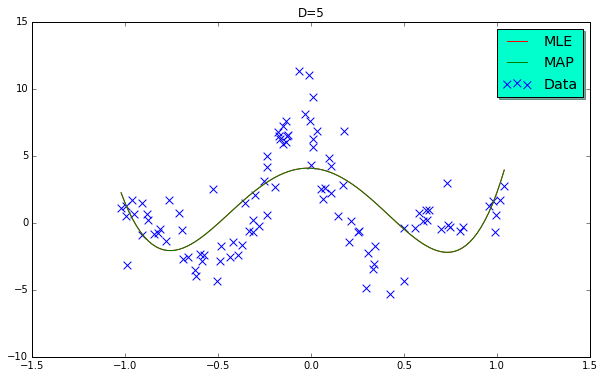

In [11]:
y_MAP = r.map_estimate_func(5, x)
y_MLE = r.ml_estimate_func(5, x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('D=5')

ax.plot(x, y_MLE, c="red", label="MLE")
ax.plot(x, y_MAP, c="green", label="MAP")
ax.scatter(X_ds1, Y_ds1, c="blue", marker="x", label="Data", s=60)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step4-d5.png")

### D = 10

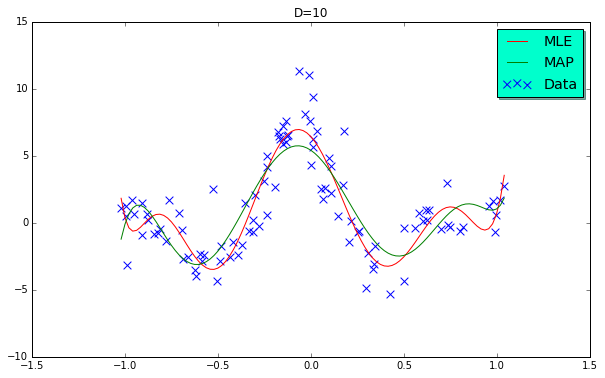

In [12]:
y_MAP = r.map_estimate_func(10, x)
y_MLE = r.ml_estimate_func(10, x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('D=10')

ax.plot(x, y_MLE, c="red", label="MLE")
ax.plot(x, y_MAP, c="green", label="MAP")
ax.scatter(X_ds1, Y_ds1, c="blue", marker="x", label="Data", s=60)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step4-d10.png")

### D = 15

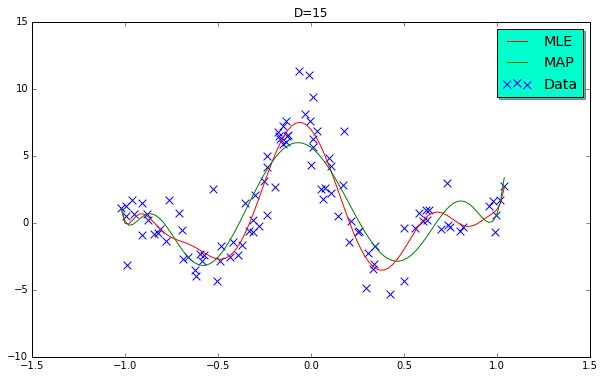

In [13]:
y_MAP = r.map_estimate_func(15, x)
y_MLE = r.ml_estimate_func(15, x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('D=15')
ax.plot(x, y_MLE, c="red", label="MLE")
ax.plot(x, y_MAP, c="green", label="MAP")
ax.scatter(X_ds1, Y_ds1, c="blue", marker="x", label="Data", s=60)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step4-d15.png")

### D = 20

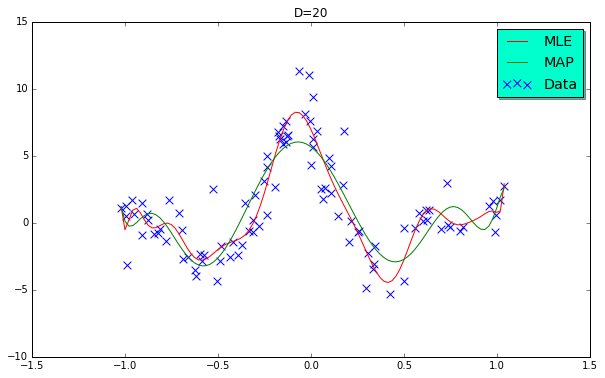

In [14]:
y_MAP = r.map_estimate_func(20, x)
y_MLE = r.ml_estimate_func(20, x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('D=20')

ax.plot(x, y_MLE, c="red", label="MLE")
ax.plot(x, y_MAP, c="green", label="MAP")
ax.scatter(X_ds1, Y_ds1, c="blue", marker="x", label="Data", s=60)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step4-d20.png")

## Step 5 - k-fold cross validation

In [15]:
permu = np.random.permutation(np.arange(100))
mse_test = []
mse_train = []
end = 100
beg = 0
D = 20
for i in range(beg, end, 10):
    X_valid = X_ds1[permu[i:i+10]]
    X_train = np.append(X_ds1[permu[i+10:end]], X_ds1[permu[beg:i]])
    
    Y_valid = Y_ds1[permu[i:i+10]]
    Y_train = np.append(Y_ds1[permu[i+10:end]], Y_ds1[permu[beg:i]])
    
    D = 20 # number of basis functions
    new_r = Regression(X_train, Y_train, D)
    new_r.map_estimate()
    mse_test.append(new_r.calc_map_mse(X_valid, Y_valid))
    mse_train.append(new_r.calc_map_mse(X_train, Y_train))
    
mse_test = np.array(mse_test)
mse_avg_test = np.sum(mse_test, axis=0)
mse_train = np.array(mse_train)
mse_avg_train = np.sum(mse_train, axis=0)

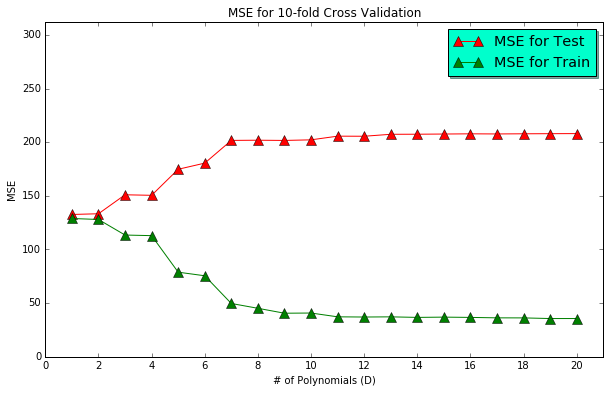

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("MSE for 10-fold Cross Validation")
ax.set_xlabel("# of Polynomials (D)")
ax.set_ylabel("MSE")
ax.set_xlim(0, 21)
ax.set_ylim(0, mse_avg_test.max() + mse_avg_test.max()/2)
ax.set_xticks(np.arange(0, 22, 2.0))
ax.plot(np.arange(1, D+1), mse_avg_test, c="red", label="MSE for Test", marker='^', markersize="10")
ax.plot(np.arange(1, D+1), mse_avg_train, c="green", label="MSE for Train", marker='^', markersize="10")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
fig.savefig("step5.png")

## Bayesian Regression

## Step 6 - Loading second dataset

In [17]:
X_ds2 = np.loadtxt('A2_data/dataset2_inputs.txt')
Y_ds2 = np.loadtxt('A2_data/dataset2_outputs.txt')

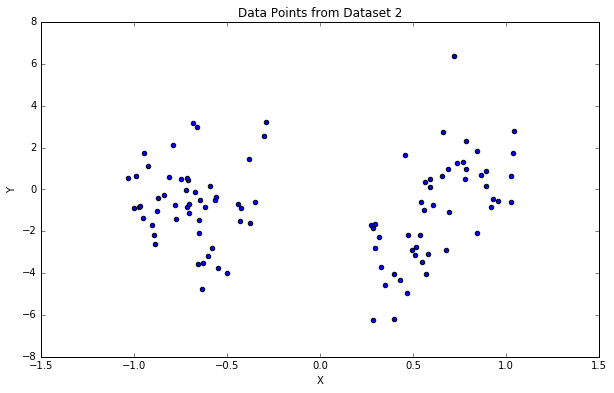

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Data Points from Dataset 2")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.scatter(X_ds2, Y_ds2)
fig.savefig("step6.png")

## Step 7 - Bayesian Regression

In [21]:
D = 13
br = Regression(X_ds2, Y_ds2, D)
br.map_estimate()

In [22]:
std = 1.5
var = pow(std, -2)
prior_std = pow(1000, -2)
num = D
post_w_var = np.linalg.inv((prior_std * np.eye(num)) + np.dot(var * np.eye(num), np.dot(np.transpose(br.MAP_Phi[num-1]), br.MAP_Phi[num-1])))# (13, 13)
post_w_mean = np.dot(np.dot(np.dot(np.dot(pow(std, -2), np.eye(num)), post_w_var), np.transpose(br.MAP_Phi[num-1])), br.Y)

In [23]:
predicted_mean = []
for i in range(len(X_ds2)):
    predicted_mean.append(np.dot(post_w_mean, br.MAP_Phi[num-1][i]))
predicted_mean = np.array(predicted_mean)
predicted_var = np.sqrt(pow(std, 2) + np.dot(np.dot(np.transpose(br.MAP_Phi[num-1][0]), post_w_var), br.MAP_Phi[num-1][0]))

In [24]:
mean_add = map(lambda x: x+predicted_var, predicted_mean)

In [25]:
mean_sub = map(lambda x: x-predicted_var, predicted_mean)

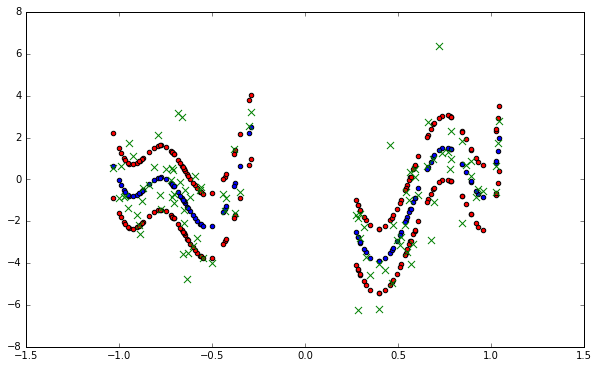

In [26]:
x = np.linspace(X_ds2.min(),X_ds2.max(), 100)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(br.X, predicted_mean, c='blue')
ax.scatter(br.X, mean_add, c='red')
ax.scatter(br.X, mean_sub, c="red")
ax.scatter(br.X, br.Y, c='green', s=50, marker="x")
fig.savefig("step7.png")